In [37]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Importing some useful libraries and scripts

import pandas as pd # For dataframe related tasks
import numpy as np # For numerical tasks

# For data visualization
import seaborn as sns 
import matplotlib.pyplot as plt


# For train test spliting while training our model
from sklearn.model_selection import train_test_split

# A module for model training
from sklearn.ensemble import RandomForestClassifier

# A module for accuracy score checking
from sklearn.metrics import accuracy_score

In [39]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data'

In [40]:
# Reading our data

df = pd.read_csv(data_folder_path + '/wine_quality_data.csv')
df.head()    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
# Lets check if there is any missing value

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [42]:
# Lets see the statstical behaviour of our features

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


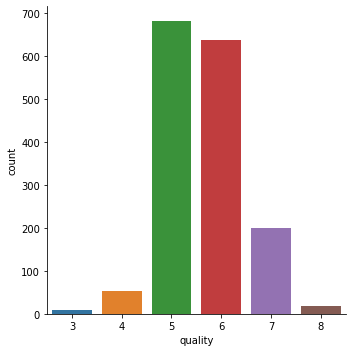

In [43]:
# Plotting the number of quality counts

sns.catplot(x='quality',data=df,kind='count')

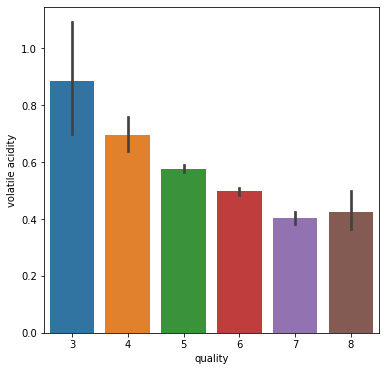

In [44]:
# Plotting the relationship between volatile acidity and wine quality

fig = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='volatile acidity', data = df)

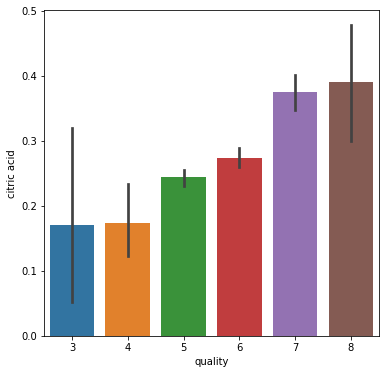

In [45]:
# Plotting the relationship between citric acidity and wine quality

fig = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='citric acid', data = df)

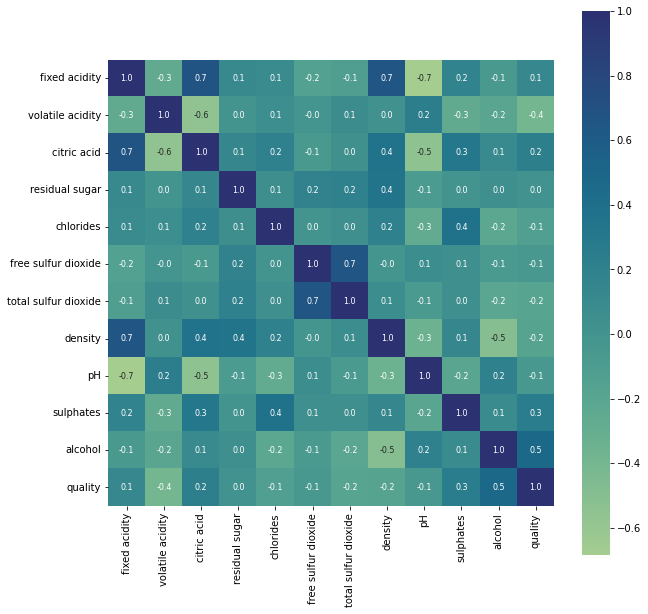

In [46]:
# Plotting the graph of overall relation

plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr,cbar=True,
            square = True,
            fmt = '.1f',
            annot = True,
            annot_kws = {'size':8},
            cmap = 'crest')

In [47]:
# Lets assume to have a good quality if the score is above 7 so lets make the other scores 0

df['quality'] = df['quality'].apply(lambda x: 1 if x >=7 else 0)
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


In [48]:
# Extracting the feature and target

X = df.drop(columns = 'quality',axis = 1)
y = df['quality']

In [49]:
# Lets see their shapes

print(X.shape,y.shape)

(1599, 11) (1599,)


In [50]:
'''
 Train test splitting using (80,20) ratio
 We used the argument stratify to have a standardized train test split
 i.e. the train set will have a balanced 0 and 1 ratio
'''

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [51]:
# Initializing and training the Ensemble model

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
# Checking the training set accuracy 

pred = model.predict(X_train)
accuracy = round(accuracy_score(pred,y_train),2)
print(f'Accuracy of the training set is: {int(accuracy * 100)}%')

Accuracy of the training set is: 100%


In [53]:
# Checking the test set accuracy to check if there is any overfitting

pred = model.predict(X_test)
accuracy = round(accuracy_score(pred,y_test),2)
print(f'Accuracy of the test set is: {int(accuracy * 100)}%')

Accuracy of the test set is: 94%


In [54]:
# Lets take some values in the test set and predict

check_data = X_test[:5]
prediction = model.predict(check_data)

In [55]:
# Checking the accuracy of our sampled data

accurate_results = np.array(prediction == y_test[:5],dtype=int)
print('The model accurately predicted {} out of {}'.format(
    np.sum(accurate_results),
    len(accurate_results)
))

The model accurately predicted 5 out of 5
